# Setup and Context

<img src="https://i.imgur.com/gugIA5r.png" width=700>

### Introduction

Dr Ignaz Semmelweis was a Hungarian physician born in 1818 who worked in the Vienna General Hospital. In the past people thought of illness as caused by "bad air" or evil spirits. But in the 1800s Doctors started looking more at anatomy, doing autopsies and started making arguments based on data. Dr Semmelweis suspected that something was going wrong with the procedures at Vienna General Hospital. Semmelweis wanted to figure out why so many women in maternity wards were dying from childbed fever (i.e., [puerperal fever](https://en.wikipedia.org/wiki/Postpartum_infections)).

<img src=https://i.imgur.com/lSyNUwR.png width=700>

Today you will become Dr Semmelweis. This is your office 👆. You will step into Dr Semmelweis' shoes and analyse the same data collected from 1841 to 1849.

### The Data Source

Dr Semmelweis published his research in 1861. I found the scanned pages of the [full text with the original tables in German](http://www.deutschestextarchiv.de/book/show/semmelweis_kindbettfieber_1861), but an excellent [English translation can be found here](http://graphics8.nytimes.com/images/blogs/freakonomics/pdf/the%20etiology,%20concept%20and%20prophylaxis%20of%20childbed%20fever.pdf).

<img src=https://i.imgur.com/6HfLtaC.png width=500>

Learning points for today:
1. Argue using data, superimpose histograms to show differences
2. Kernel Density Estimate(KDE) for graphic estimate
3. scipy for statistical significance with p-values
4. highlight parts of time series, add and configure legend in matplotlib
5. Use numpy's where() function to process depending on condition

Given: Notebook and challenges setup, imports, formatting and reading datasets

### Upgrade plotly (only Google Colab Notebook)

Google Colab may not be running the latest version of plotly. If you're working in Google Colab, uncomment the line below, run the cell, and restart your notebook server.

In [1]:
# %pip install --upgrade plotly

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.3/16.3 MB 54.0 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.24.1
    Uninstalling plotly-5.24.1:
      Successfully uninstalled plotly-5.24.1


### Import Statements

In [2]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

### Notebook Presentation

In [27]:
pd.options.display.float_format = '{:,.2f}'.format

# Create locators for ticks on the time axis
month_locator = mdates.MonthLocator()
year_locator = mdates.YearLocator()


from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

### Read the Data

In [4]:
df_yearly = pd.read_csv('annual_deaths_by_clinic.csv')
# parse_dates avoids DateTime conversion later
df_monthly = pd.read_csv('monthly_deaths.csv',
                      parse_dates=['date'])

# Preliminary Data Exploration

**Challenge**: Check out these two DataFrames ☝️.
* What is the shape of df_yearly and df_monthly? How many rows and columns?
* What are the column names?
* Which years are included in the dataset?
* Are there any NaN values or duplicates?
* What were the average number of births that took place per month?
* What were the average number of deaths that took place per month?

In [5]:
print("Shape of yearly data:", df_yearly.shape)
print("Shape of monthly data:", df_monthly.shape)
print("Columns of yearly data:", df_yearly.columns)
print("Columns of monthly data:", df_monthly.columns)

Shape of yearly data: (12, 4)
Shape of monthly data: (98, 3)
Columns of yearly data: Index(['year', 'births', 'deaths', 'clinic'], dtype='object')
Columns of monthly data: Index(['date', 'births', 'deaths'], dtype='object')


### Check for Nan Values and Duplicates

In [8]:
print("Years included: ", df_yearly.year.unique())
print("Any NaN values in yearly data?", df_yearly.isna().values.any())
print("Any NaN values in monthly data?", df_monthly.isna().values.any())
print("Any duplicate values in yearly data?", df_yearly.duplicated().values.any())
print("Any duplicate values in monthly data?", df_monthly.duplicated().values.any())

Years included:  [1841 1842 1843 1844 1845 1846]
Any NaN values in yearly data? False
Any NaN values in monthly data? False
Any duplicate values in yearly data? False
Any duplicate values in monthly data? False


### Descriptive Statistics

In [10]:
print("Average births per month:", df_monthly.births.mean())
print(df_monthly.births.describe())
print("Average deaths per month:", df_monthly.deaths.mean())
print(df_monthly.deaths.describe())

Average births per month: 267.0
count    98.00
mean    267.00
std      41.77
min     190.00
25%     242.50
50%     264.00
75%     292.75
max     406.00
Name: births, dtype: float64
Average deaths per month: 22.46938775510204
count   98.00
mean    22.47
std     18.14
min      0.00
25%      8.00
50%     16.50
75%     36.75
max     75.00
Name: deaths, dtype: float64


Pretty standard stuff. No sweat so far. But there were a few things I missed, as can be seen after reviewing the solution. It includes looking at the head and tail data for both, and using info to check for NaN values for ease. So this next cell will have them all

In [16]:
print("yearly head: \n", df_yearly.head())
print("\nyearly tail: \n", df_yearly.tail())
print("\nmonthly head: \n", df_monthly.head())
print("\nmonthly tail: \n", df_monthly.tail())
print("\nyearly info: \n")
print(df_yearly.info())
print("\nmonthly info: \n")
print(df_monthly.info())

yearly head: 
    year  births  deaths    clinic
0  1841    3036     237  clinic 1
1  1842    3287     518  clinic 1
2  1843    3060     274  clinic 1
3  1844    3157     260  clinic 1
4  1845    3492     241  clinic 1

yearly tail: 
     year  births  deaths    clinic
7   1842    2659     202  clinic 2
8   1843    2739     164  clinic 2
9   1844    2956      68  clinic 2
10  1845    3241      66  clinic 2
11  1846    3754     105  clinic 2

monthly head: 
         date  births  deaths
0 1841-01-01     254      37
1 1841-02-01     239      18
2 1841-03-01     277      12
3 1841-04-01     255       4
4 1841-05-01     255       2

monthly tail: 
          date  births  deaths
93 1848-11-01     310       9
94 1848-12-01     373       5
95 1849-01-01     403       9
96 1849-02-01     389      12
97 1849-03-01     406      20

yearly info: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  

### Percentage of Women Dying in Childbirth

**Challenge**: How dangerous was childbirth in the 1840s in Vienna?

* Using the annual data, calculate the percentage of women giving birth who died throughout the 1840s at the hospital.


In comparison, the United States recorded 18.5 maternal deaths per 100,000 or 0.018% in 2013 [(source).](
https://en.wikipedia.org/wiki/Maternal_death#:~:text=The%20US%20has%20the%20%22highest,17.8%20per%20100%2C000%20in%202009)

In [98]:
print(f"Maternity death rate throughout the 1840s: {(df_yearly.deaths.sum() / df_yearly.births.sum())*100:.3}%")

Maternity death rate throughout the 1840s: 7.08%


The :.3 part I added after looking at the solution, mine had too many numbers after the decimal.

# Visualise the Total Number of Births 🤱 and Deaths 💀 over Time

### Plot the Monthly Data on Twin Axes

**Challenge**: Create a [Matplotlib chart](https://matplotlib.org/3.3.2/api/_as_gen/matplotlib.pyplot.plot.html) with twin y-axes. It should look something like this:

<img src=https://i.imgur.com/F9DOJxx.png width=700>

* Format the x-axis using locators for the years and months (Hint: we did this in the Google Trends notebook)
* Set the range on the x-axis so that the chart lines touch the y-axes
* Add gridlines
* Use `skyblue` and `crimson` for the line colours
* Use a dashed line style for the number of deaths
* Change the line thickness to 3 and 2 for the births and deaths respectively.
* Do you notice anything in the late 1840s?

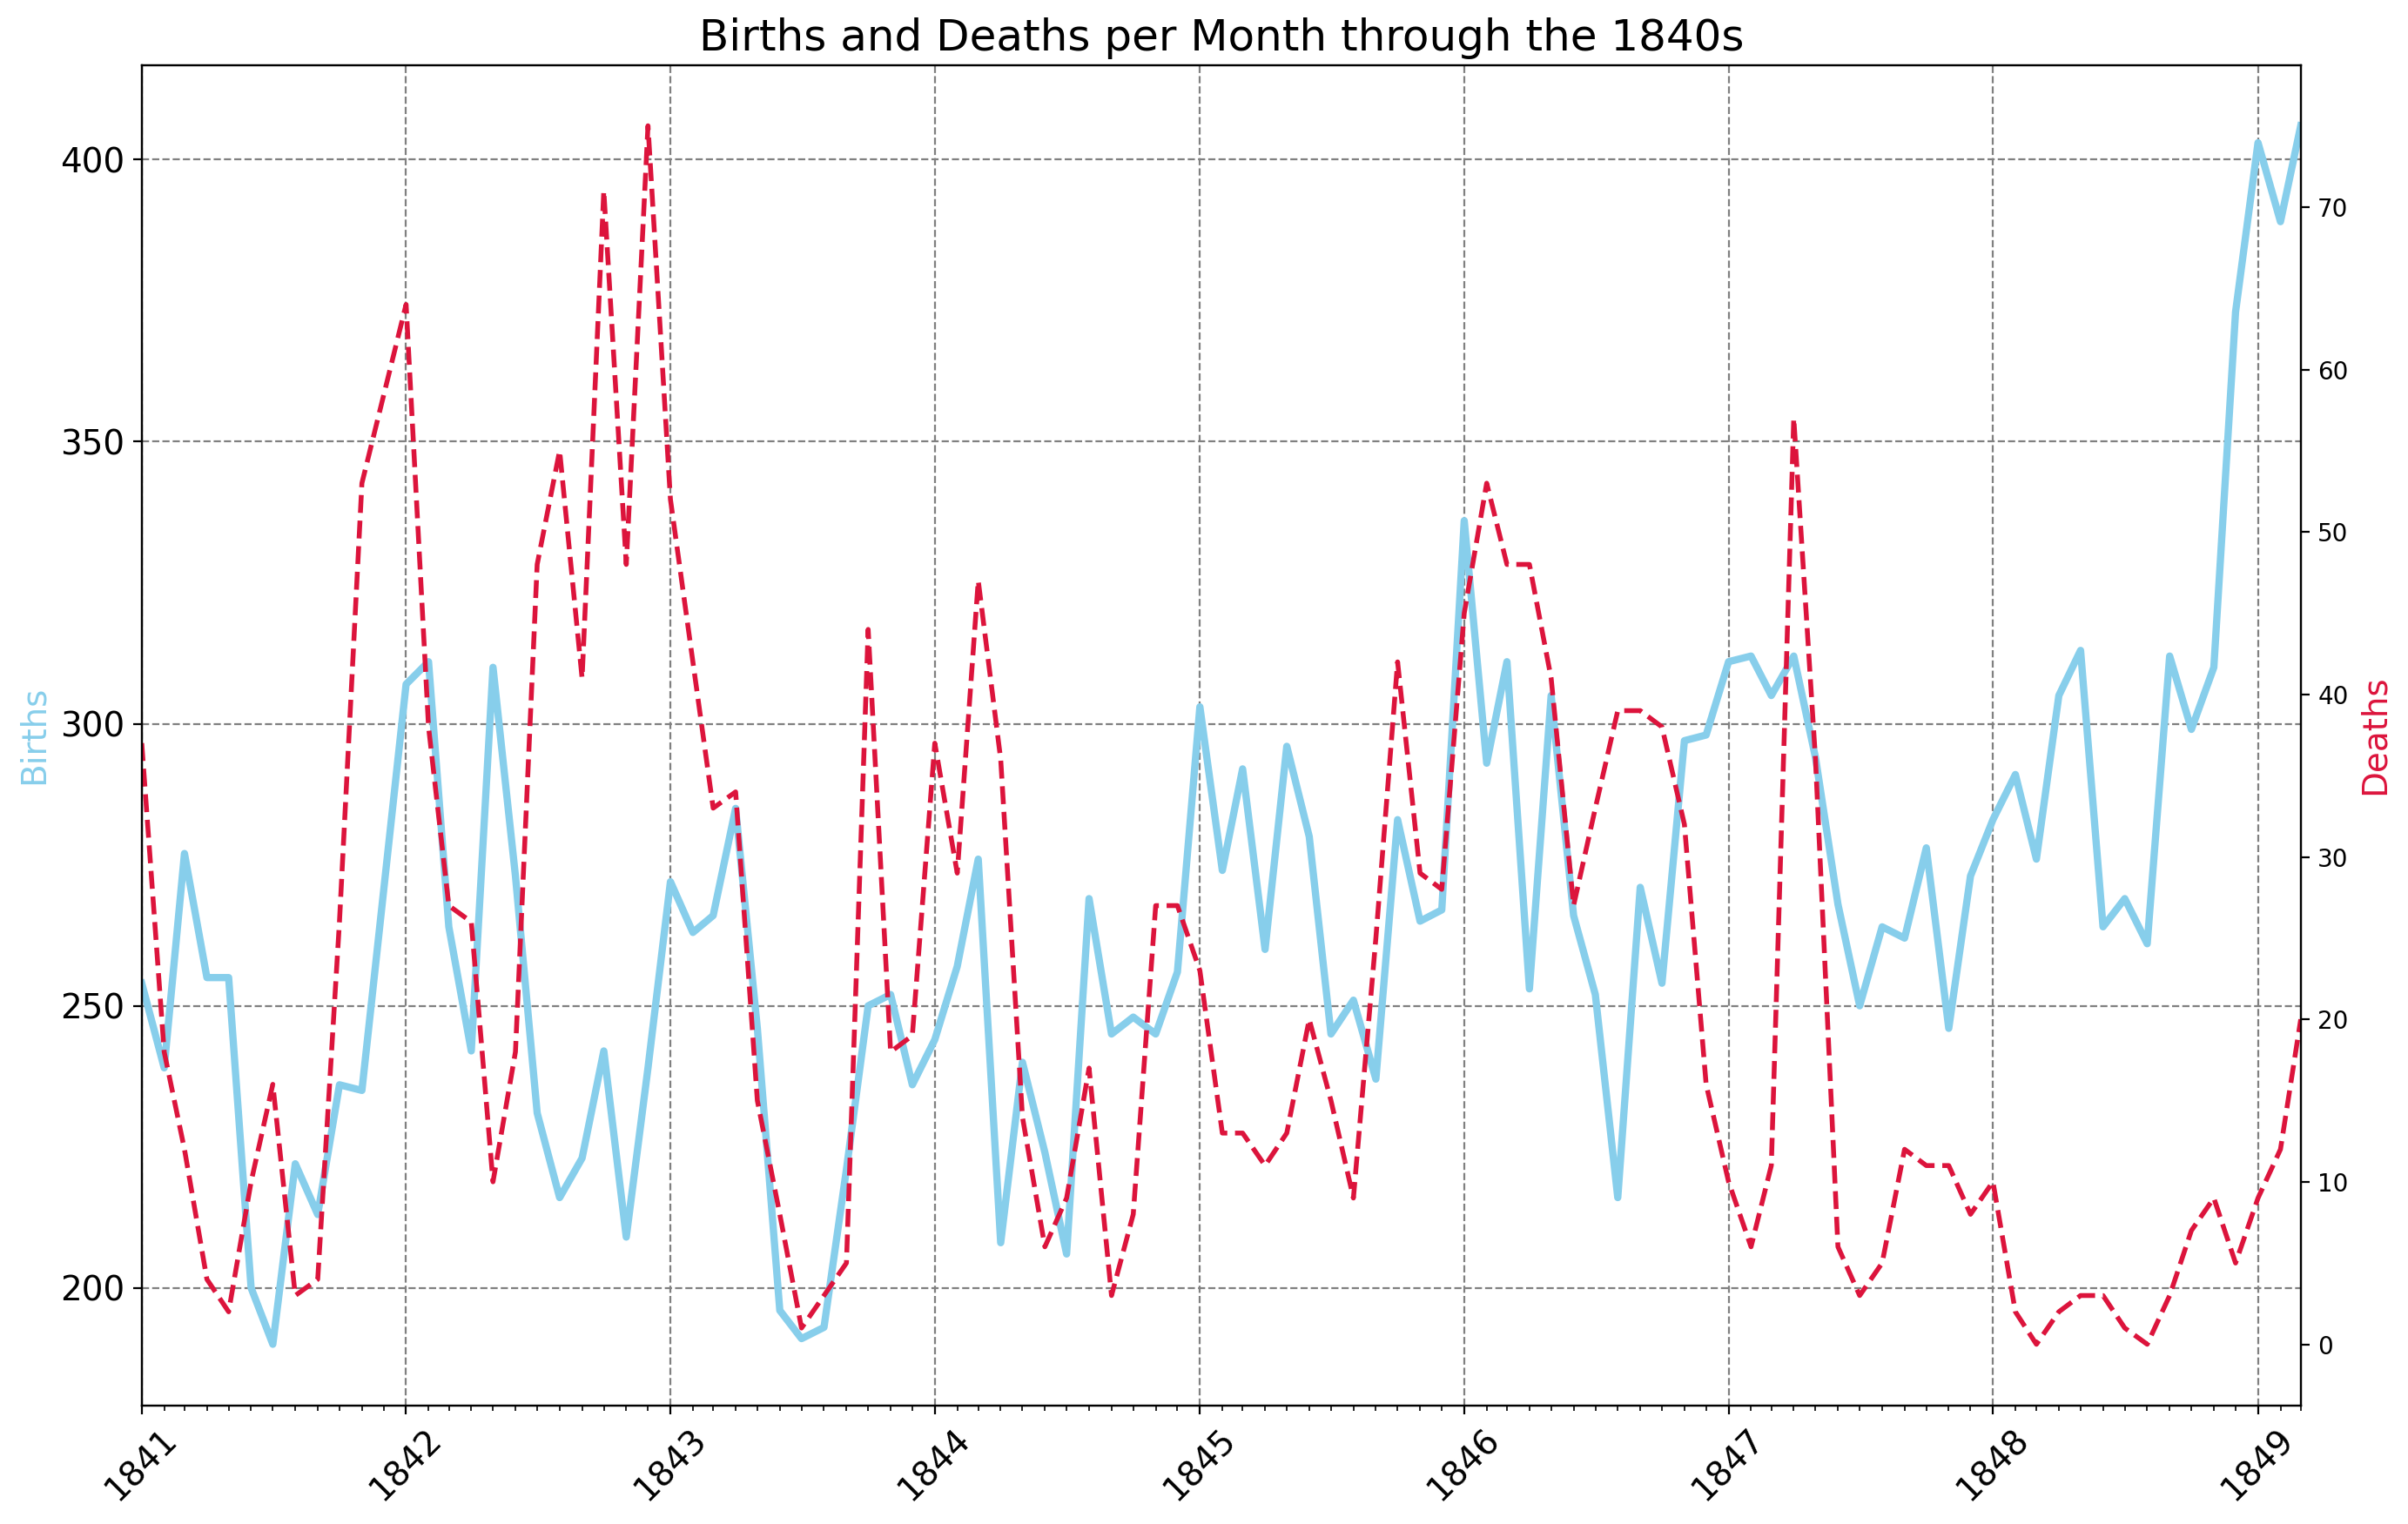

In [30]:
plt.figure(figsize=(16,10), dpi= 200)
plt.title('Births and Deaths per Month through the 1840s', fontsize= 18)
plt.grid(color='grey', linestyle='--')
plt.yticks(fontsize=14)
plt.xticks(fontsize=14, rotation=45)

ax1= plt.gca()
ax2= ax1.twinx()

ax1.plot(df_monthly.date, df_monthly.births, linewidth=3, color='skyblue')
ax2.plot(df_monthly.date, df_monthly.deaths, color='crimson', linewidth= 2, linestyle='--')

ax1.set_xlim(df_monthly.date.min(), df_monthly.date.max())
ax1.xaxis.set_major_locator(year_locator)
ax1.xaxis.set_minor_locator(month_locator)
ax1.set_ylabel('Births', fontsize= 14, color= 'skyblue')
ax2.set_ylabel('Deaths', fontsize= 14, color= 'crimson')

plt.show()

Compared to course solution:

- My chart had no title so I added it.
- It had a format set for year with mdates.DateFormatter('%Y') but mine is already formatted well so...
- I hadn't put xticks and yticks so my xticks weren't rotated like the course solution. Now it's identical

Apart from the locators, which I had to google, the rest was a breeze, even though it took me some time to get it as per the instructions.

In the late 1840s we can see the graph for birth had climbed to 250, even reaching 300+ later, while the death rate fell to below 20 and even below 10 per month. This signifies a change in the hospital which prompted positive maternity metrics.

# The Yearly Data Split by Clinic

Now let's look at the annual data instead.

**Challenge**: Use plotly to create line charts of the births and deaths of the two different clinics at the Vienna General Hospital.
* Which clinic is bigger or more busy judging by the number of births?
* Has the hospital had more patients over time?
* What was the highest number of deaths recorded in clinic 1 and clinic 2?

In [35]:
px.line(df_yearly, x= 'year', y= 'births', color= 'clinic')

For this one I had to glance at the solution. I was thinking I had to plot the two pairs of line charts in a single chart, but turns out I was to create two different plots.

In [36]:
px.line(df_yearly, x= 'year', y= 'deaths', color= 'clinic')

Interpretation: The births chart suggests that clinic 1 with medical students and doctors consistently had higher number of children being born.

The death charts have more information: in 1842, when there were more births in clinic 1 relatively than 2, there was a spike in mortality rate as well. The rate steadily decreased for clinic 2 over the years, but death rate shot up after half of 1840s, this suggests problems within clinic 1.

### Calculate the Proportion of Deaths at Each Clinic

**Challenge**: Calculate the proportion of maternal deaths per clinic. That way we can compare like with like.
* Work out the percentage of deaths for each row in the `df_yearly` DataFrame by adding a column called "pct_deaths".
* Calculate the average maternal death rate for clinic 1 and clinic 2 (i.e., the total number of deaths per the total number of births).
* Create another plotly line chart to see how the percentage varies year over year with the two different clinics.
* Which clinic has a higher proportion of deaths?
* What is the highest monthly death rate in clinic 1 compared to clinic 2?

In [37]:
df_yearly['pct_deaths'] = (df_yearly.deaths / df_yearly.births) * 100

In [53]:
clinic_1 = df_yearly.query('clinic == "clinic 1"')
clinic_2 = df_yearly.query('clinic == "clinic 2"')
# print("Average maternal death rate for clinic 1:", df_yearly.query('clinic == "clinic 1"').pct_deaths.mean())
print(f"Average maternal death rate for clinic 1: {(clinic_1.deaths.sum() / clinic_1.births.sum())*100:.3f}%")
# print("Average maternal death rate for clinic 2:", df_yearly.query('clinic == "clinic 2"').pct_deaths.mean())
print(f"Average maternal death rate for clinic 2: {(clinic_2.deaths.sum() / clinic_2.births.sum())*100:.3f}%")

Average maternal death rate for clinic 1: 9.924%
Average maternal death rate for clinic 2: 3.884%


I somehow thought a/b + c/d = (a+c)/(b+d). How naive

### Plotting the Proportion of Yearly Deaths by Clinic

In [44]:
px.line(df_yearly, x='year', y='pct_deaths', color= 'clinic')

The plot shows a clear trend that clinic 1, even though it had medical professionals, had a higher maternal death rate compared to clinic 2, with midwives.

Both clinic 1 and 2 recorded their highest maternal death rate in 1842, with clinic 1 having 15.76 and clinic 2 having 7.6 percent, we can see clinic 1 has double the mortality rate, yikes.

Dr. Semmelweis was puzzled and tried different solutions to no avail. When someone other than a birthing woman died of the same disease, he realized it might be from an infection from the corpse and asked medical personnel to clean hands and instruments with soap and chlorine(for smell, didn't know it was a disinfectant)

# The Effect of Handwashing

Dr Semmelweis made handwashing obligatory in the summer of 1947. In fact, he ordered people to wash their hands with clorine (instead of water).

In [54]:
# Date when handwashing was made mandatory
handwashing_start = pd.to_datetime('1847-06-01')

**Challenge**:
* Add a column called "pct_deaths" to `df_monthly` that has the percentage of deaths per birth for each row.
* Create two subsets from the `df_monthly` data: before and after Dr Semmelweis ordered washing hand.
* Calculate the average death rate prior to June 1947.
* Calculate the average death rate after June 1947.

In [55]:
df_monthly['pct_deaths'] = (df_monthly.deaths / df_monthly.births) * 100
df_monthly.head()

,date,births,deaths,pct_deaths
0,1841-01-01,254,37,14.57
1,1841-02-01,239,18,7.53
2,1841-03-01,277,12,4.33
3,1841-04-01,255,4,1.57
4,1841-05-01,255,2,0.78


In [57]:
df_before = df_monthly.loc[df_monthly.date < handwashing_start]
df_before.tail()

,date,births,deaths,pct_deaths
71,1847-01-01,311,10,3.22
72,1847-02-01,312,6,1.92
73,1847-03-01,305,11,3.61
74,1847-04-01,312,57,18.27
75,1847-05-01,294,36,12.24


In [58]:
df_after = df_monthly.loc[df_monthly.date >= handwashing_start]
df_after.head()

,date,births,deaths,pct_deaths
76,1847-06-01,268,6,2.24
77,1847-07-01,250,3,1.20
78,1847-08-01,264,5,1.89
79,1847-09-01,262,12,4.58
80,1847-10-01,278,11,3.96


In [60]:
print(f"Average death rate before: {(df_before.deaths.sum() / df_before.births.sum())*100:.3f}%")
print(f"Average death rate after: {(df_after.deaths.sum() / df_after.births.sum())*100:.3f}%")

Average death rate before: 10.526%
Average death rate after: 2.153%


We can clearly see a big difference made by the decision to wash hands

### Calculate a Rolling Average of the Death Rate

**Challenge**: Create a DataFrame that has the 6 month rolling average death rate prior to mandatory handwashing.

*Hint*: You'll need to set the dates as the index in order to avoid the date column being dropped during the calculation.

In [85]:
df_rolling_before = df_before.groupby('date').rolling(window=6, min_periods=1).mean().reset_index().set_index('date').drop(columns='level_1')
# df_rolling_before.droplevel(level= 'date')
# # df_rolling_before.drop(index= 'num') # Because there are currently two indices, one being date
df_rolling_before.head()

,births,deaths,pct_deaths
date,,,
1841-01-01,254.00,37.00,14.57
1841-02-01,239.00,18.00,7.53
1841-03-01,277.00,12.00,4.33
1841-04-01,255.00,4.00,1.57
1841-05-01,255.00,2.00,0.78


In [86]:
# Course solution, also endorsed by GPT, when I went asking for help to make mine work(i.e. reset the index)
rolling_df = df_before.set_index('date').rolling(window=6, min_periods=1).mean()
rolling_df.head()

,births,deaths,pct_deaths
date,,,
1841-01-01,254.00,37.00,14.57
1841-02-01,246.50,27.50,11.05
1841-03-01,256.67,22.33,8.81
1841-04-01,256.25,17.75,7.00
1841-05-01,256.00,14.60,5.76


I think it means pct_deaths only, but I'll have all the columns there for now

### Highlighting Subsections of a Line Chart

**Challenge**: Copy-paste and then modify the Matplotlib chart from before to plot the monthly death rates (instead of the total number of births and deaths). The chart should look something like this:

<img src=https://i.imgur.com/X6TQe0R.png width=500>

* Add 3 seperate lines to the plot: the death rate before handwashing, after handwashing, and the 6-month moving average before handwashing.
* Show the monthly death rate before handwashing as a thin dashed black line.
* Show the moving average as a thicker, crimon line.
* Show the rate after handwashing as a skyblue line with round markers.
* Look at the [code snippet in the documentation to see how you can add a legend](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.legend.html) to the chart.

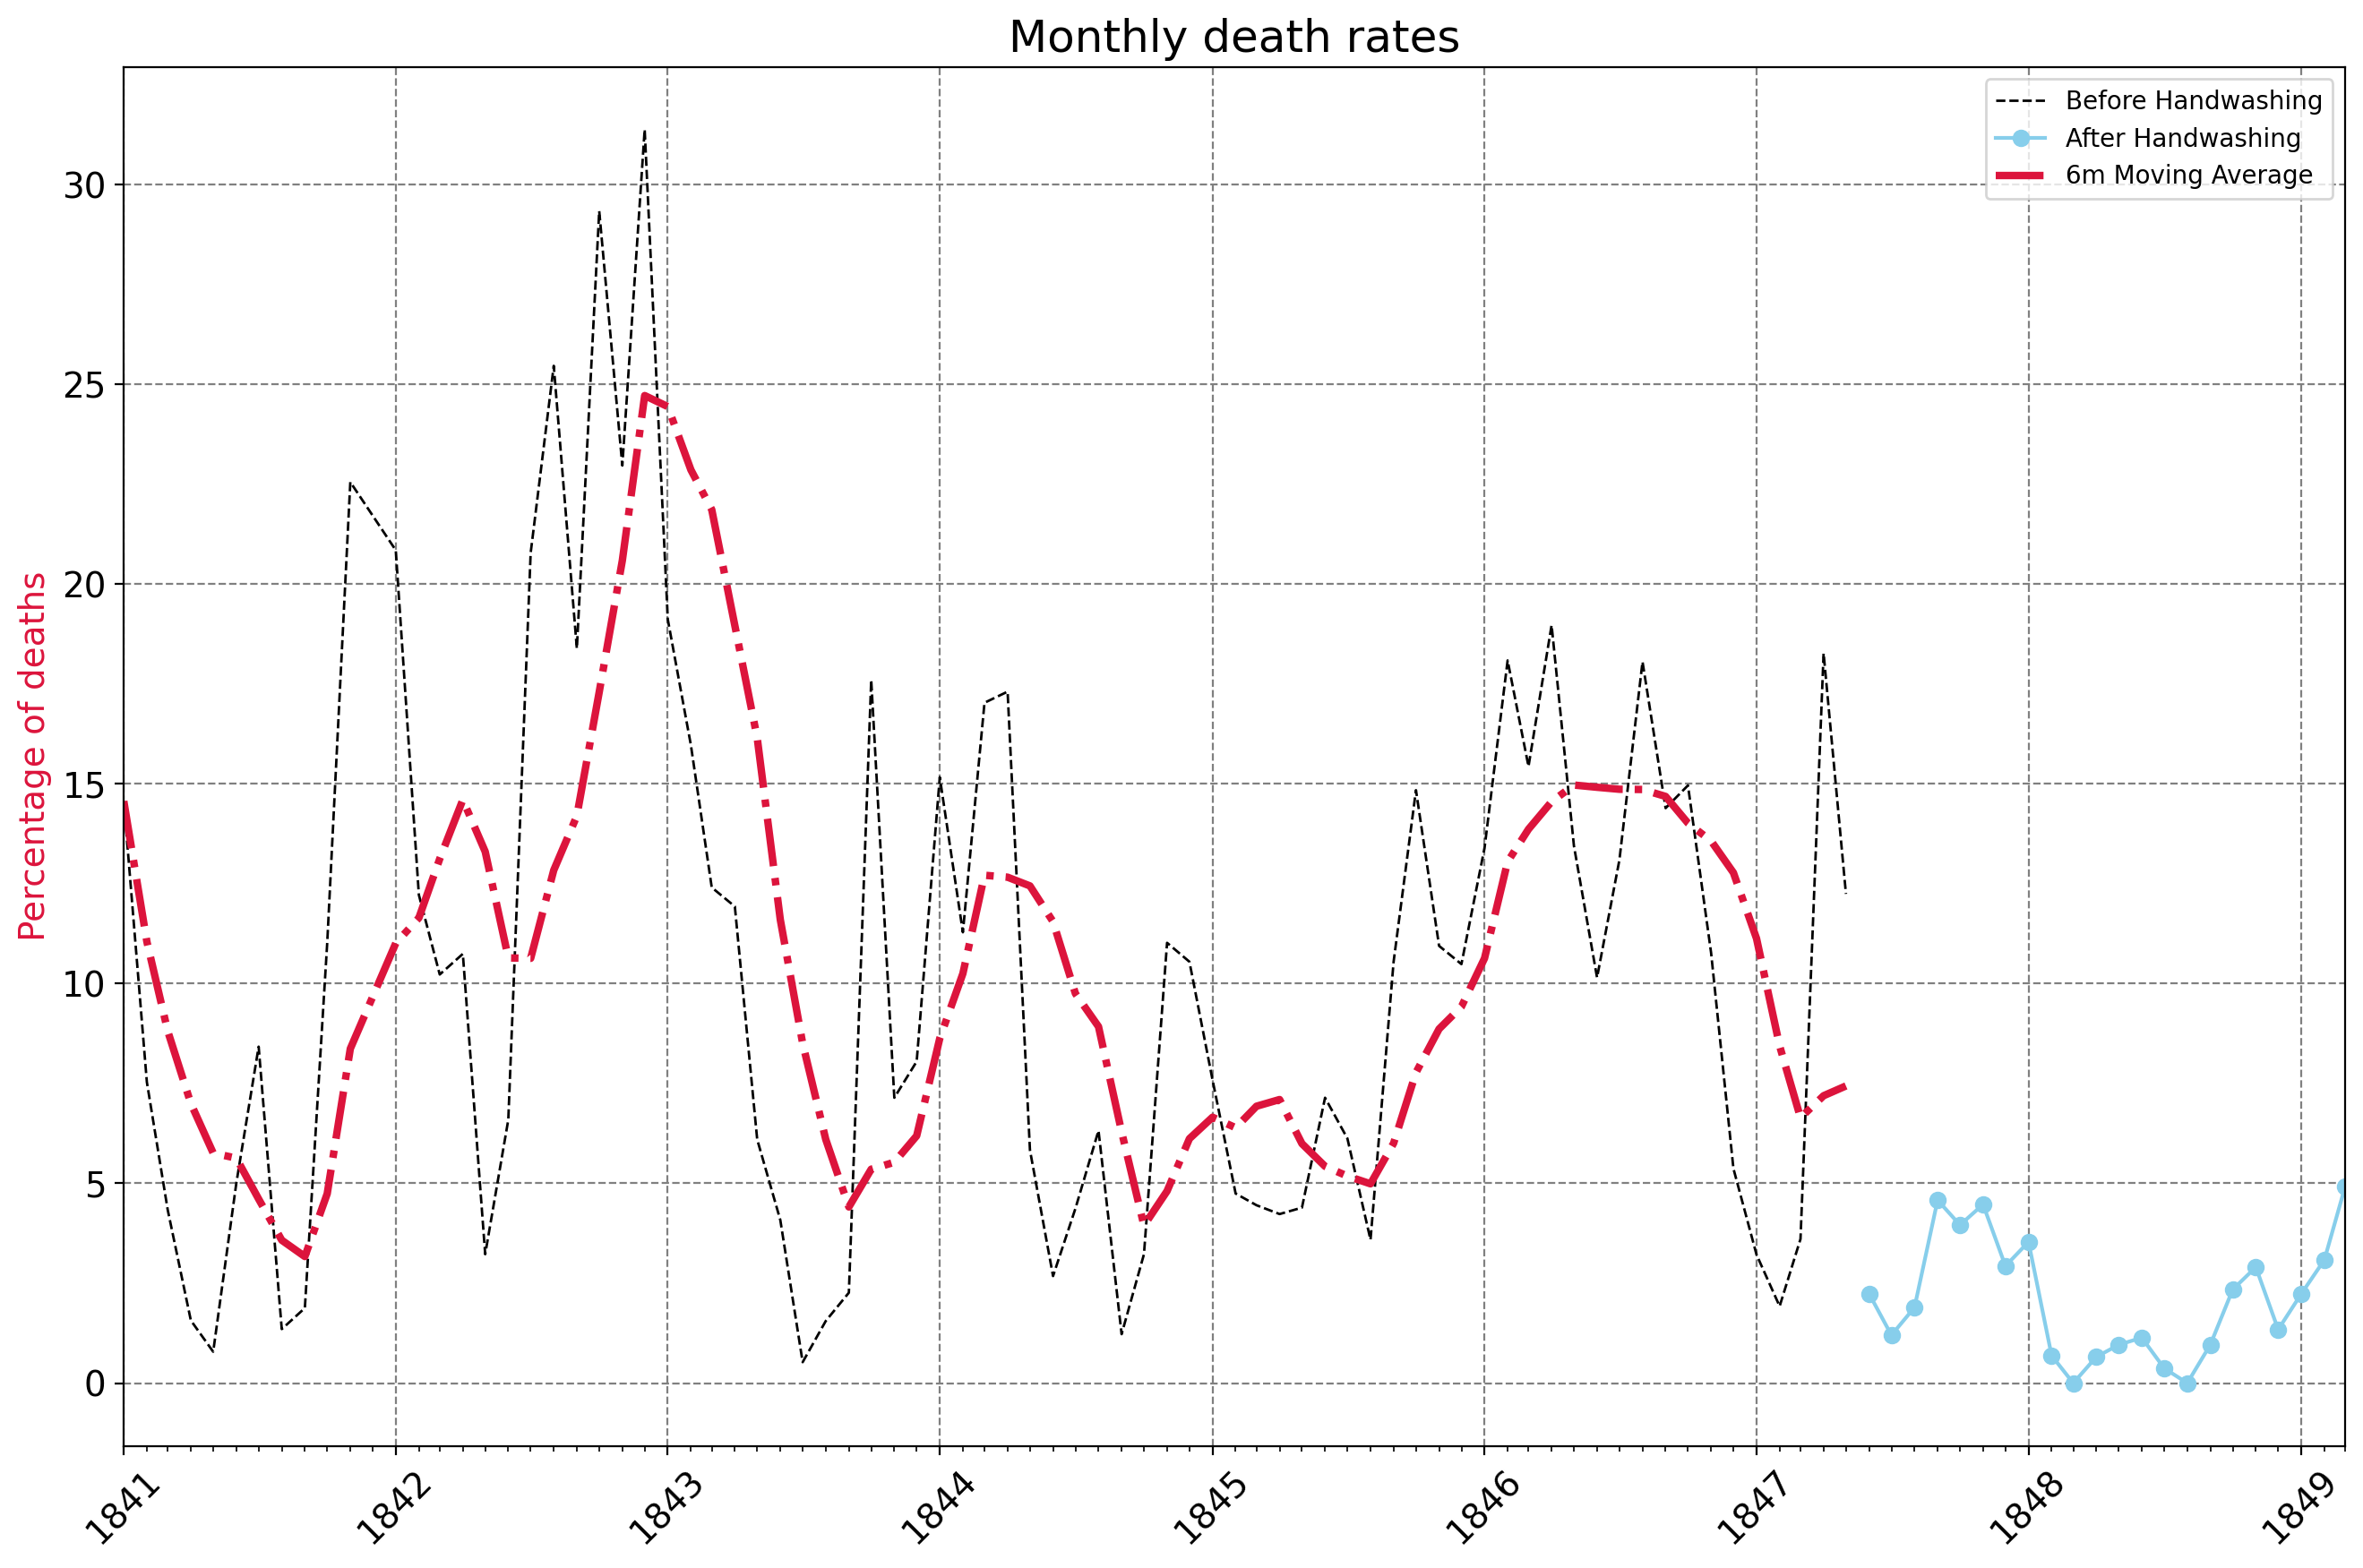

In [95]:
plt.figure(figsize=(16,10), dpi= 200)
plt.title('Monthly death rates', fontsize= 18)
plt.grid(color='grey', linestyle='--')
plt.yticks(fontsize=14)
plt.xticks(fontsize=14, rotation=45)

ax= plt.gca()
ax.xaxis.set_major_locator(year_locator)
ax.xaxis.set_minor_locator(month_locator)
ax.set_xlim(df_monthly.date.min(), df_monthly.date.max())
ax.set_ylabel('Percentage of deaths', fontsize= 14, color= 'crimson')

bh_line = plt.plot(df_before.date, df_before.pct_deaths, color= 'black', linestyle='--', linewidth= 1, label='Before Handwashing')
ah_line = plt.plot(df_after.date, df_after.pct_deaths, color='skyblue', marker='o', label='After Handwashing')
ma_line = plt.plot(rolling_df.index, rolling_df.pct_deaths, color= 'crimson', linewidth= 3, linestyle='-.', label='6m Moving Average')
plt.legend()


plt.show()

had to refer to the course solution after spending over an hour I think

Needed to consolidate all axes into one, store the plt.plot return values into variables, then plot it and display the legend

Using the df_rolling_before gave me the exact same graph as the death graph from before, so it means the rolling wasn't successful by that method. I wonder why.

Oh- It's because by grouping the rows by date, I've effectively isolated the rows, and now they roll only with themselves, meaning if I had set min_periods greater than 1, all values would be NaN

### Statistics - Calculate the Difference in the Average Monthly Death Rate

**Challenge**:
* What was the average percentage of monthly deaths before handwashing?
* What was the average percentage of monthly deaths after handwashing was made obligatory?
* By how much did handwashing reduce the average chance of dying in childbirth in percentage terms?
* How do these numbers compare to the average for all the 1840s that we calculated earlier?
* How many times lower are the chances of dying after handwashing compared to before?

In [96]:
print(f"Average monthly death percentage before: {df_before.pct_deaths.mean():.3f}")
print(f"Average monthly death percentage after: {df_after.pct_deaths.mean():.3f}")

Average monthly death percentage before: 10.505
Average monthly death percentage after: 2.109


In [99]:
print(f"Chance of death at childbirth reduced by: {(df_before.pct_deaths.mean() - df_after.pct_deaths.mean()):.3f}%")
print(f"Chances are now {(df_before.pct_deaths.mean() / df_after.pct_deaths.mean()):.3f} times lower.")

Chance of death at childbirth reduced by: 8.396%
Chances are now 4.980 times lower.


For the reduction in average chance, I thought there would be deeper implications and more maths, but only a difference was needed.

The average death ratio for all 1840s was around 7, so it was more before, and less after

### Use Box Plots to Show How the Death Rate Changed Before and After Handwashing

**Challenge**:
* Use [NumPy's `.where()` function](https://numpy.org/doc/stable/reference/generated/numpy.where.html) to add a column to `df_monthly` that shows if a particular date was before or after the start of handwashing.
* Then use plotly to create box plot of the data before and after handwashing.
* How did key statistics like the mean, max, min, 1st and 3rd quartile changed as a result of the new policy?



In [104]:
df_monthly['handwashing'] = np.where(df_monthly.date < handwashing_start, 'before', 'after')
df_monthly.sample(5)

,date,births,deaths,pct_deaths,handwashing
46,1844-12-01,256,27,10.55,before
20,1842-10-01,242,71,29.34,before
24,1843-02-01,263,42,15.97,before
21,1842-11-01,209,48,22.97,before
93,1848-11-01,310,9,2.90,after


In [108]:
px.box(df_monthly, x= 'handwashing', y= 'deaths', color= 'handwashing')

At first, I had put x='date' and was wondering why I had so many small box plots, then I realized I'm supposed to see this not as a time series but as a comparative analysis tool.

### Use Histograms to Visualise the Monthly Distribution of Outcomes

**Challenge**: Create a [plotly histogram](https://plotly.com/python/histograms/) to show the monthly percentage of deaths.

* Use docs to check out the available parameters. Use the [`color` parameter](https://plotly.github.io/plotly.py-docs/generated/plotly.express.histogram.html) to display two overlapping histograms.
* The time period of handwashing is shorter than not handwashing. Change `histnorm` to `percent` to make the time periods comparable.
* Make the histograms slighlty transparent
* Experiment with the number of bins on the histogram. Which number work well in communicating the range of outcomes?
* Just for fun, display your box plot on the top of the histogram using the `marginal` parameter.

In [122]:
hist = px.histogram(df_monthly, x= 'date', y= 'pct_deaths', color= 'handwashing',
             histnorm='percent', nbins=30,
                    marginal= 'box')
hist.update_layout(barmode = 'overlay')
hist.update_traces(opacity = 0.75)

I was initially using deaths as y axis, but used pct_deaths as suggested by the course solution later. Apparently the stuff I did with update overlay and traces can be done inside the histogram function itself. Oh the biggest difference, the X axis is death percentage and Y is left to be count

In [124]:
# Course like soln
hist = px.histogram(df_monthly, x= 'pct_deaths', color= 'handwashing',
             histnorm='percent', nbins=30, opacity = 0.75,
                    marginal= 'box', barmode = 'overlay')
hist.show()

### Use a Kernel Density Estimate (KDE) to visualise a smooth distribution

**Challenge**: Use [Seaborn's `.kdeplot()`](https://seaborn.pydata.org/generated/seaborn.kdeplot.html) to create two kernel density estimates of the `pct_deaths`, one for before handwashing and one for after.

* Use the `shade` parameter to give your two distributions different colours.
* What weakness in the chart do you see when you just use the default parameters?
* Use the `clip` parameter to address the problem.


<Axes: xlabel='pct_deaths', ylabel='Density'>

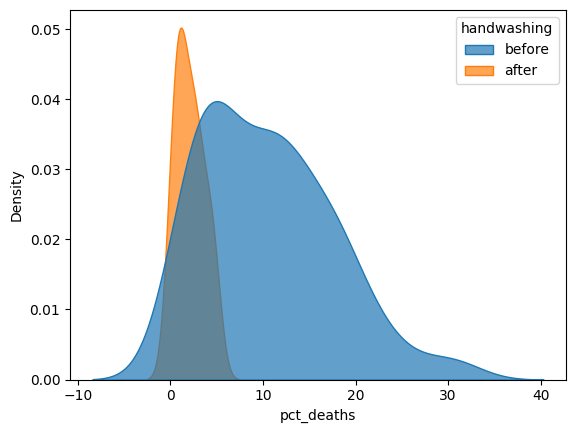

In [126]:
sns.kdeplot(df_monthly, x='pct_deaths', hue= 'handwashing', fill= True, alpha=0.7)

The shade parameter was replaced in recent versions of seaborn by fill. The weakness in current chart is negative values are present, which is not possible, so we need to clip it:

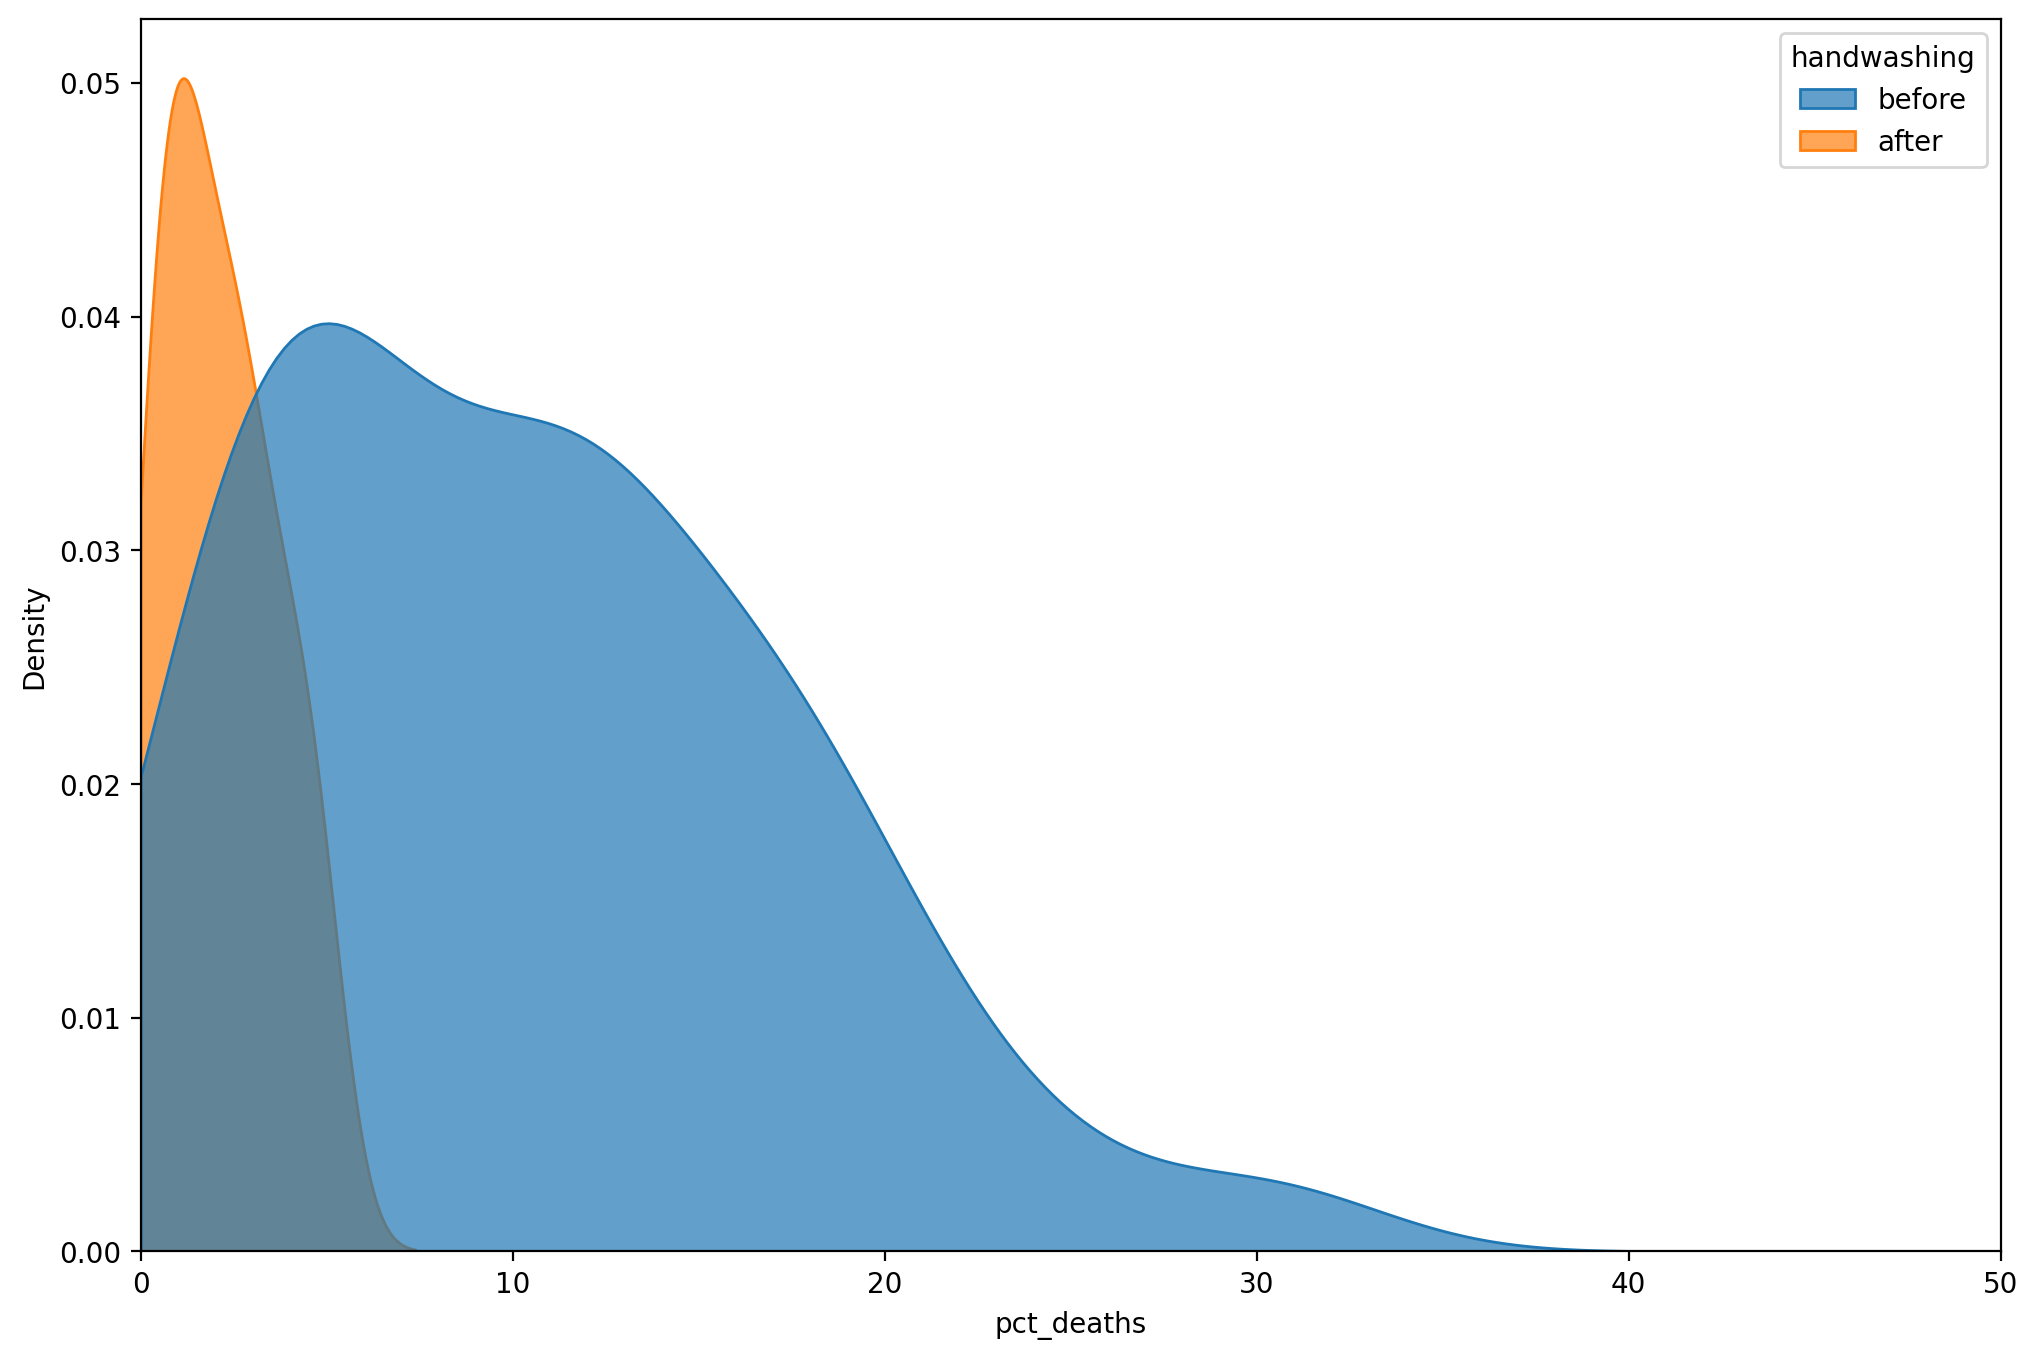

In [129]:
plt.figure(figsize=(12,8), dpi=200)
sns.kdeplot(df_monthly, x='pct_deaths', hue= 'handwashing', fill= True, alpha=0.7, clip=(0,50))
plt.xlim(0,50)
plt.show()

In [130]:
#Course solution
plt.figure(dpi=200)
sns.kdeplot(before_washing.pct_deaths,
            shade=True,
            clip=(0,1))
sns.kdeplot(after_washing.pct_deaths,
            shade=True,
            clip=(0,1))
plt.title('Est. Distribution of Monthly Death Rate Before and After Handwashing')
plt.xlim(0, 0.40)
plt.show()
# Here there are two kde plots using two dataframes, but I did it using one. Mine doesn't have a title either.

### Use a T-Test to Show Statistical Significance

**Challenge**: Use a t-test to determine if the differences in the means are statistically significant or purely due to chance.

If the p-value is less than 1% then we can be 99% certain that handwashing has made a difference to the average monthly death rate.

* Import `stats` from scipy
* Use the [`.ttest_ind()` function](https://docs.scipy.org/]doc/scipy/reference/generated/scipy.stats.ttest_ind.html) to calculate the t-statistic and the p-value
* Is the difference in the average proportion of monthly deaths statistically significant at the 99% level?



In [131]:
from scipy import stats

In [143]:
t_test = stats.ttest_ind(df_before.pct_deaths, df_after.pct_deaths)
print(f"The T-statistic is {t_test.statistic} and p-value is {t_test.pvalue:.16f}")

The T-statistic is 5.511607211341914 and p-value is 0.0000002985436557


What do you conclude from your analysis, Doctor? 😊

<img src=https://i.imgur.com/rvjNVzQ.gif>

We can see that the p value is very low, in the range of 10^-13 percentage, which means we are very highly sure that this is not by chance but an actual effect caused by handwashing.

On second thought, no, I had used the parameter equal_var=False, but after removing that, the p value comes to 10^-5 of a percent, which is still small, but a lot more realistic. so we're more than 99.9999% sure.

In [144]:
# Course soln
t_stat, p_value = stats.ttest_ind(a=before_washing.pct_deaths,
                                  b=after_washing.pct_deaths)
print(f'p-palue is {p_value:.10f}')
print(f't-statstic is {t_stat:.4}')